In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config as cfg
import seaborn as sns
import ds_functions as ds
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from data import *
from strategies import *

# Heart Failure Dataset

## Scaling

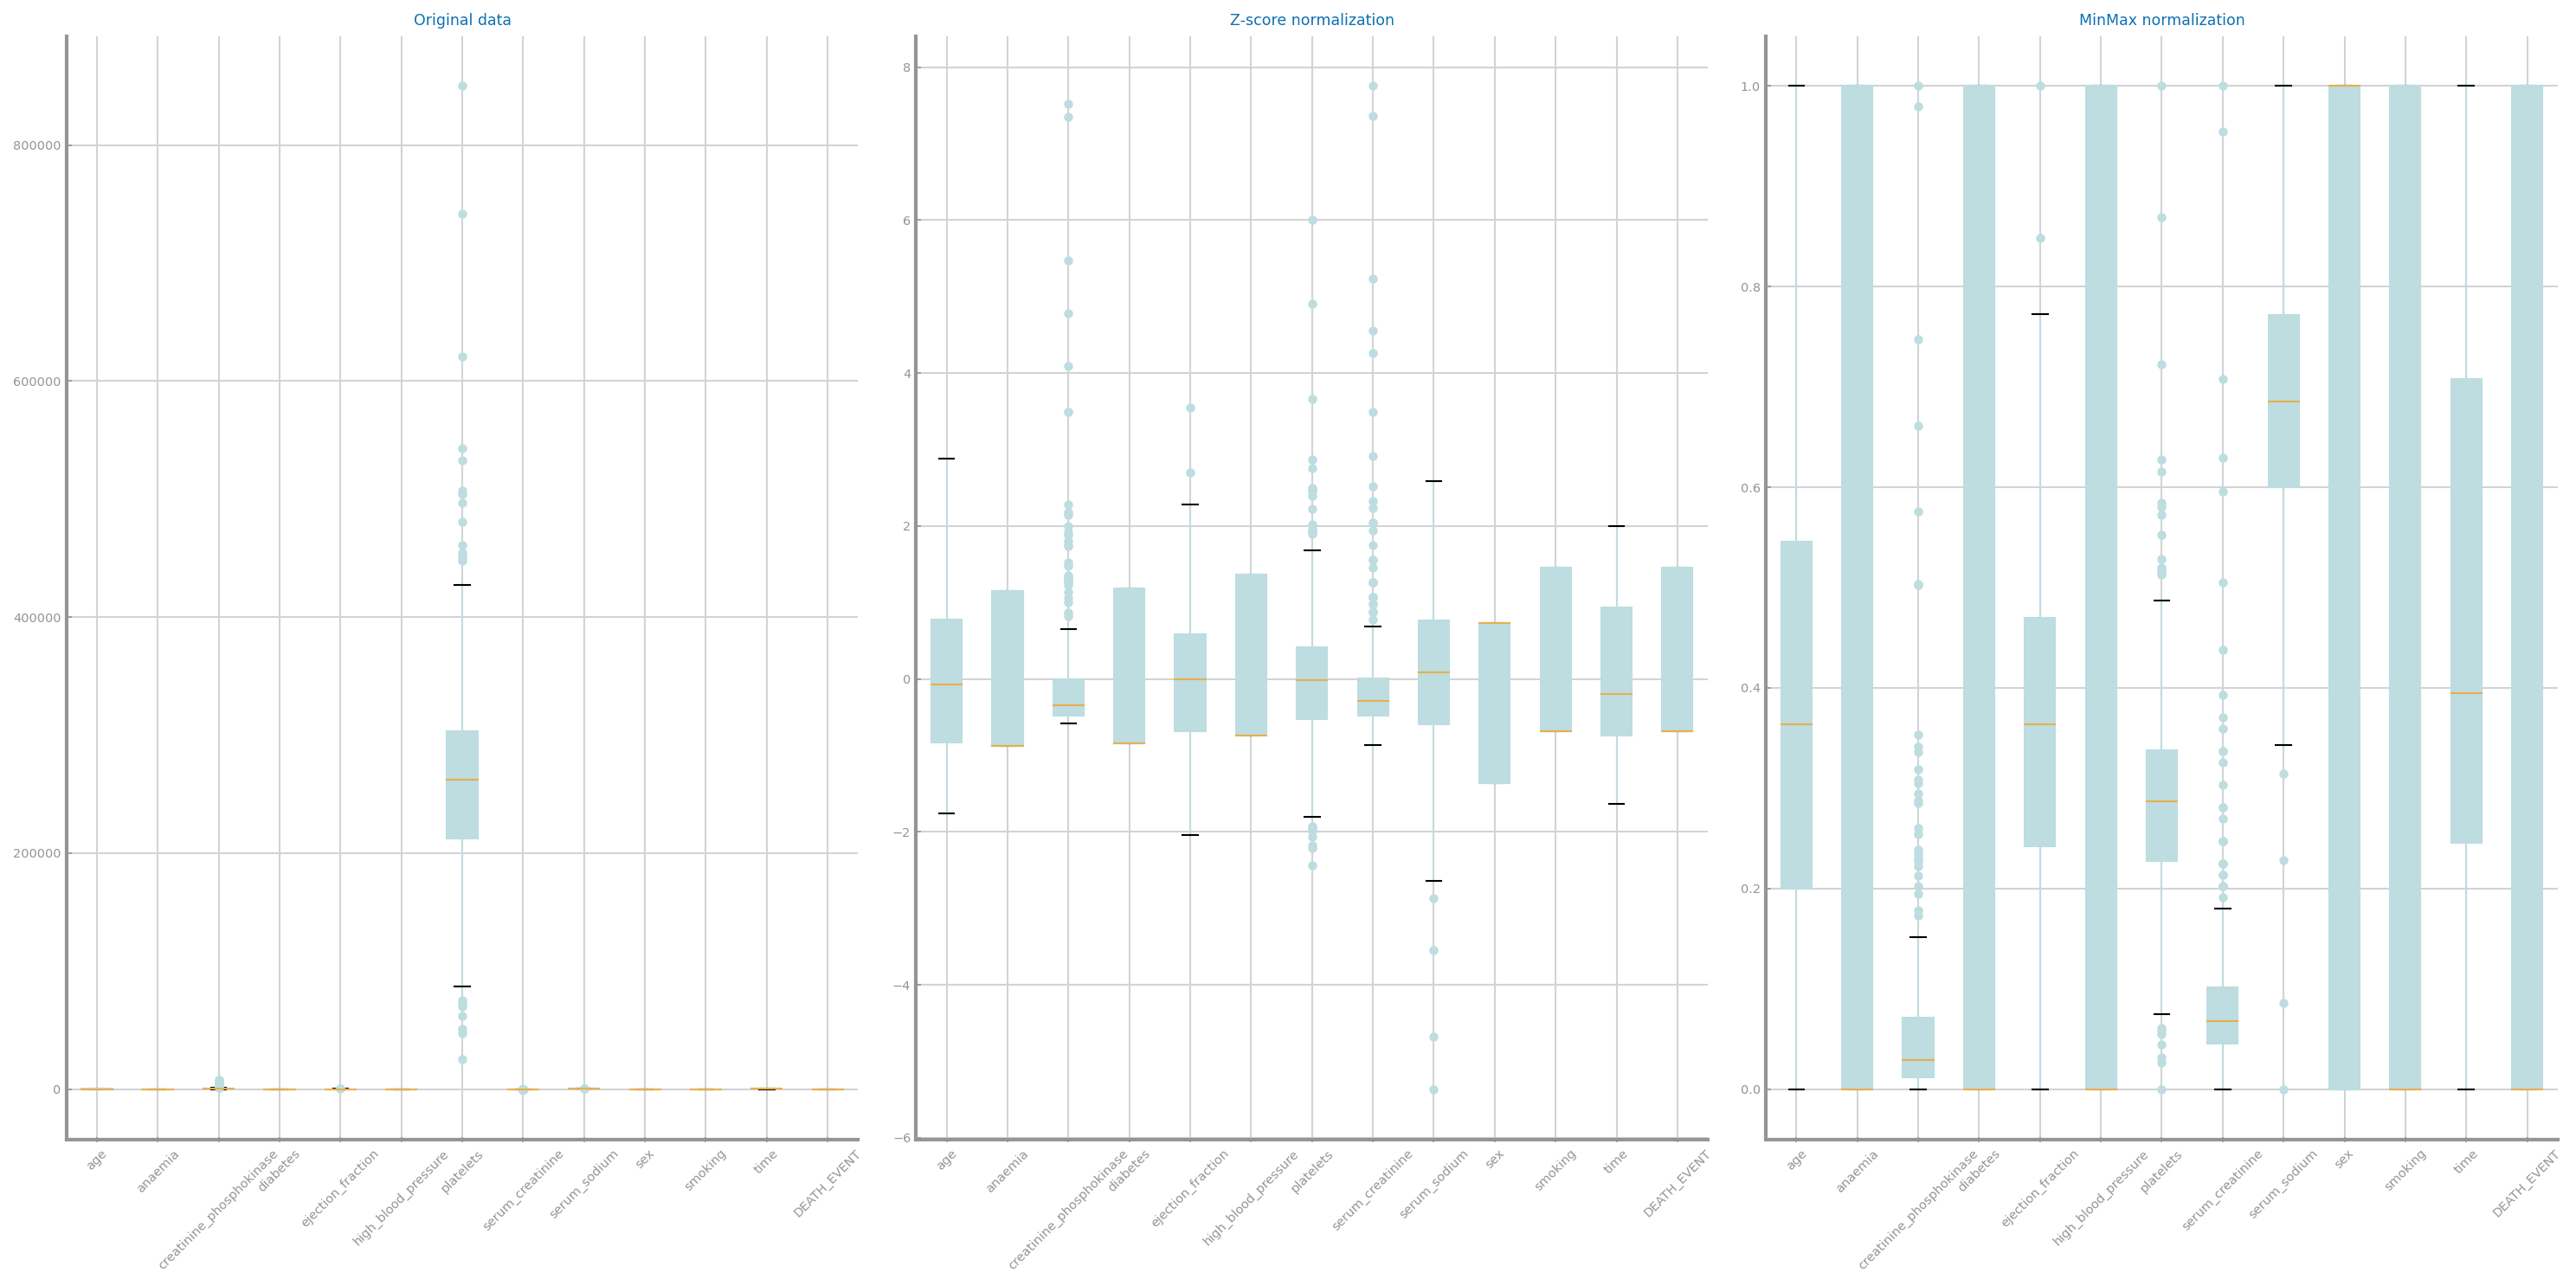

In [5]:
df_nr = get_hf_data()
norm_data_zscore = get_hf_data(scaling='z-score')
norm_data_minmax = get_hf_data(scaling='minmax')

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(20,10),squeeze=False)

axs[0, 0].set_title('Original data')
df_nr[df_nr.columns].boxplot(ax=axs[0, 0], whis=1.5)
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].set_title('Z-score normalization')
norm_data_zscore[df_nr.columns].boxplot(ax=axs[0, 1], whis=1.5)
axs[0, 1].tick_params(axis='x', rotation=45)

axs[0, 2].set_title('MinMax normalization')
norm_data_minmax[df_nr.columns].boxplot(ax=axs[0, 2], whis=1.5)
axs[0, 2].tick_params(axis='x', rotation=45)

fig.tight_layout()

## Naive Bayes

### No balancing

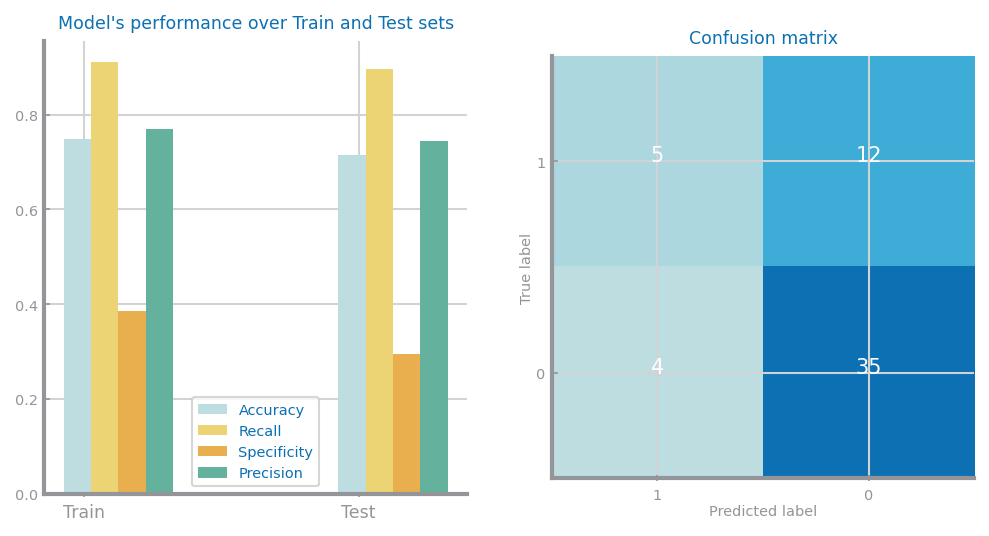

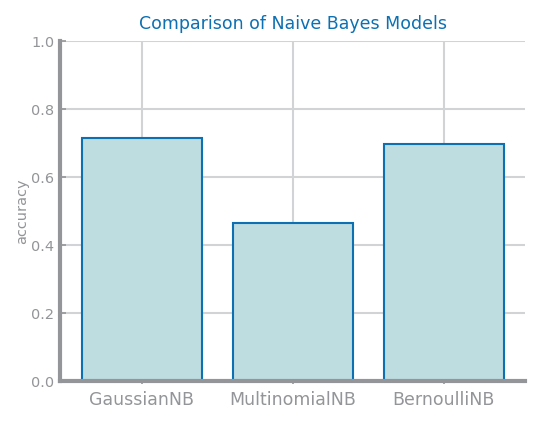

In [44]:
naiveBayes(get_hf_data(feature_selection=True, filter_outliers=True), 'DEATH_EVENT')

### Undersample

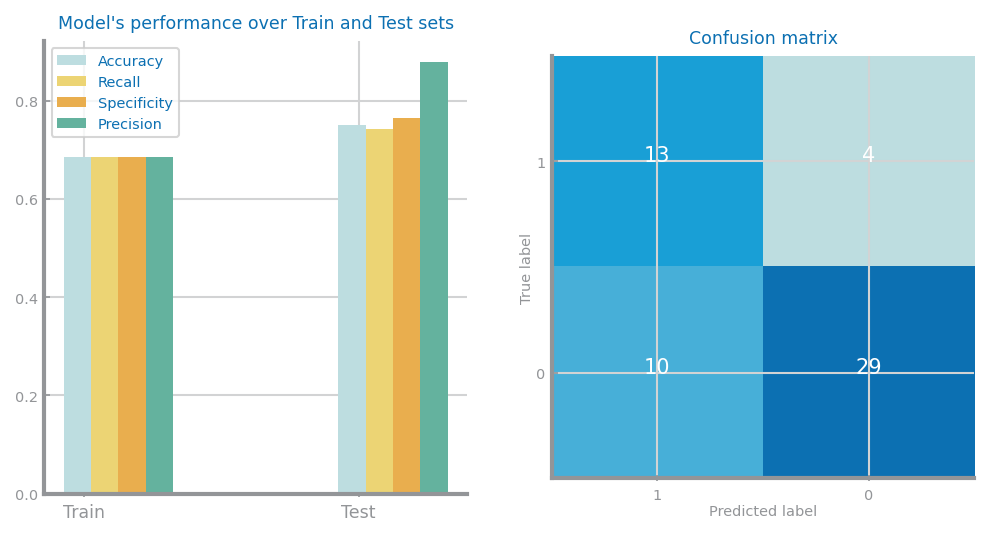

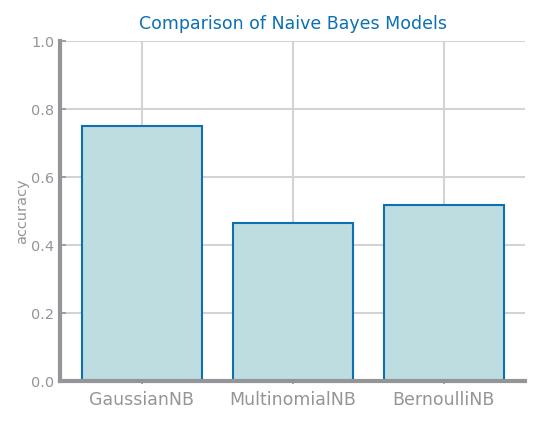

In [42]:
naiveBayes(get_hf_data(feature_selection=True, filter_outliers=True), 'DEATH_EVENT', balancing='undersample')

### Oversample

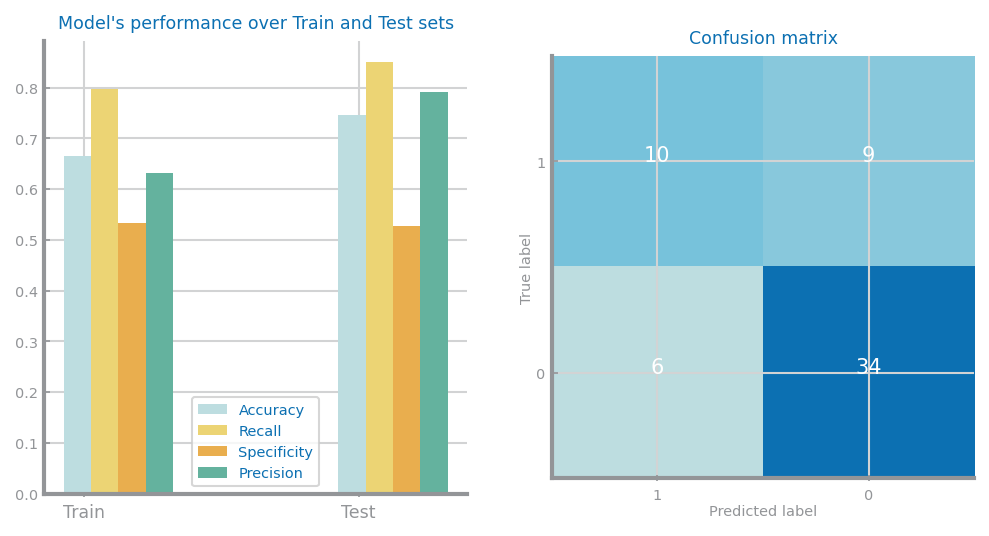

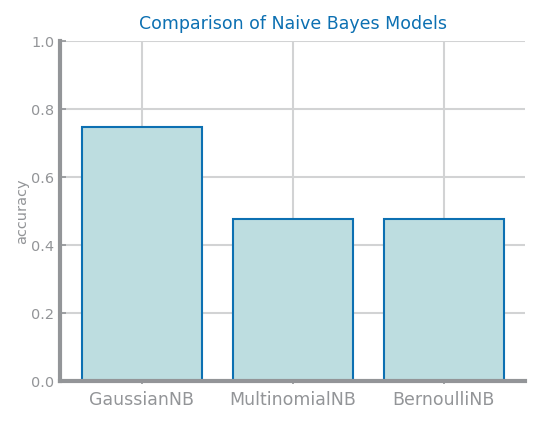

In [40]:
naiveBayes(get_hf_data(feature_selection=True, filter_outliers=False), 'DEATH_EVENT', balancing='oversample')

### SMOTE

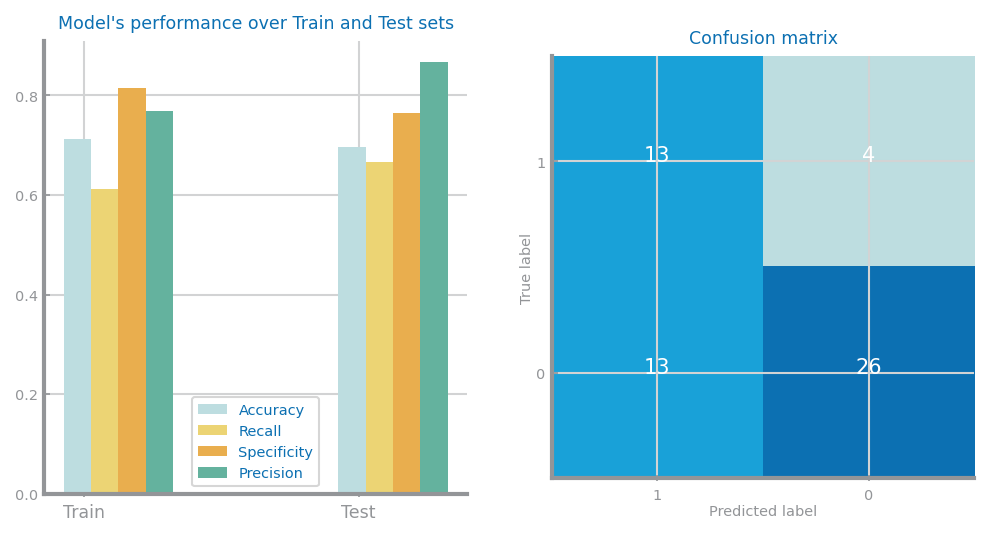

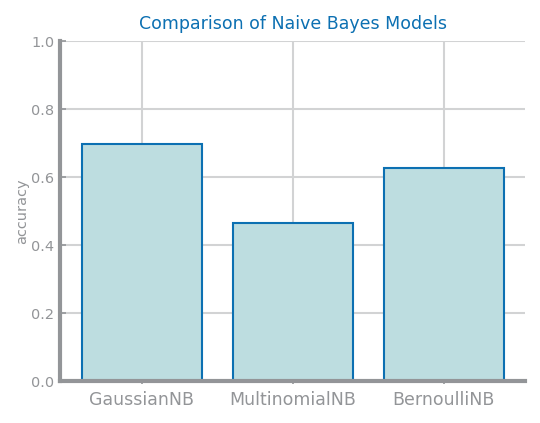

In [39]:
naiveBayes(get_hf_data(feature_selection=True, filter_outliers=True), 'DEATH_EVENT', balancing='smote')

## KNN

### No scaling

100%|██████████| 30/30 [00:00<00:00, 199.43it/s]


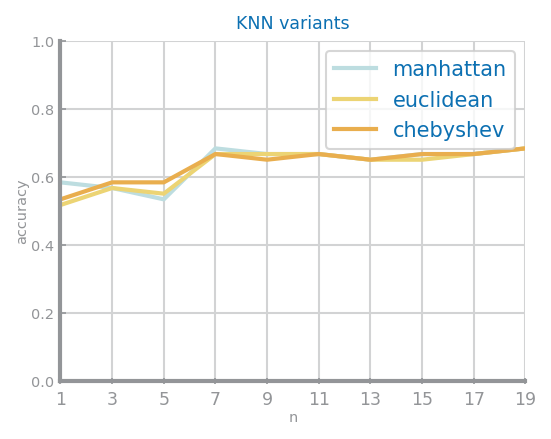

Best results with 7 neighbors and manhattan, with accuracy 0.68


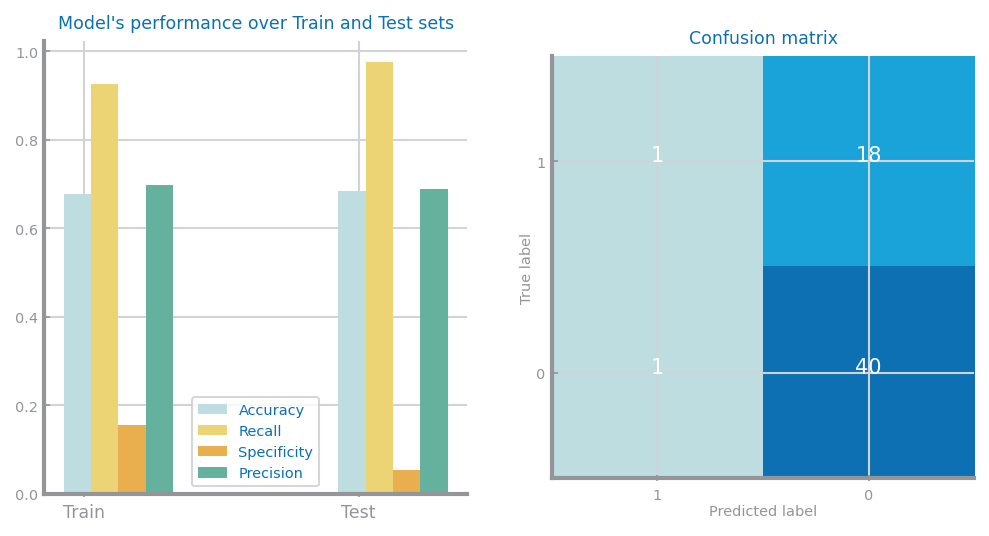

In [47]:
res = KNN(get_hf_data(), 'DEATH_EVENT')

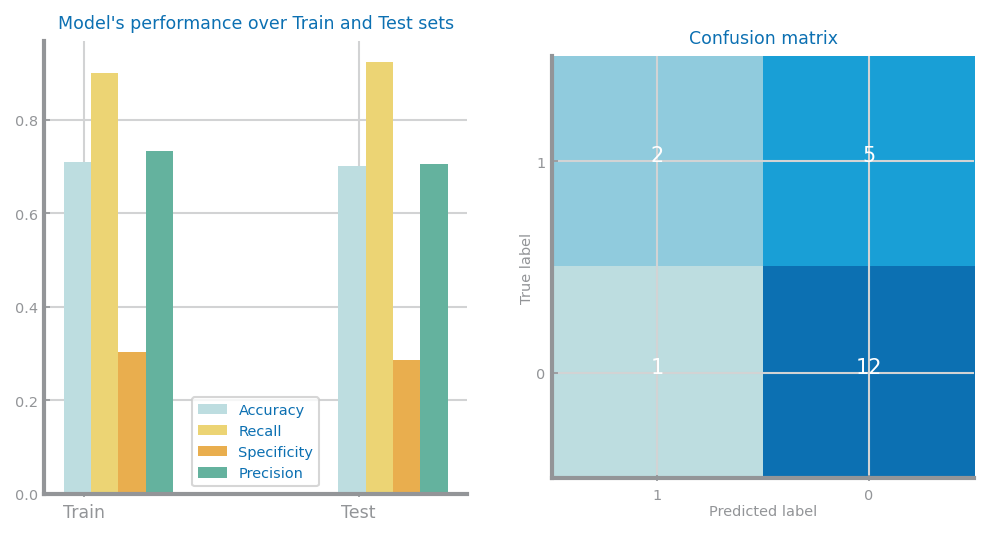

In [90]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Standardized

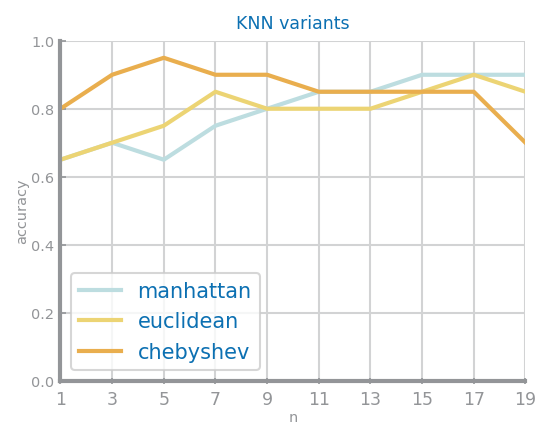

Best results with 5 neighbors and chebyshev


In [115]:
hf_df = norm_data_zscore.copy().drop(columns=['time'])
y: np.ndarray = hf_df.pop('DEATH_EVENT').values
X: np.ndarray = hf_df.values
labels = pd.unique(y)

trnY, prd_trn, tstY, prd_tst, trnX, tstX = KFold(X, y, 15)
nvalues, values = KNN(trnX, trnY, tstY, prdY)

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

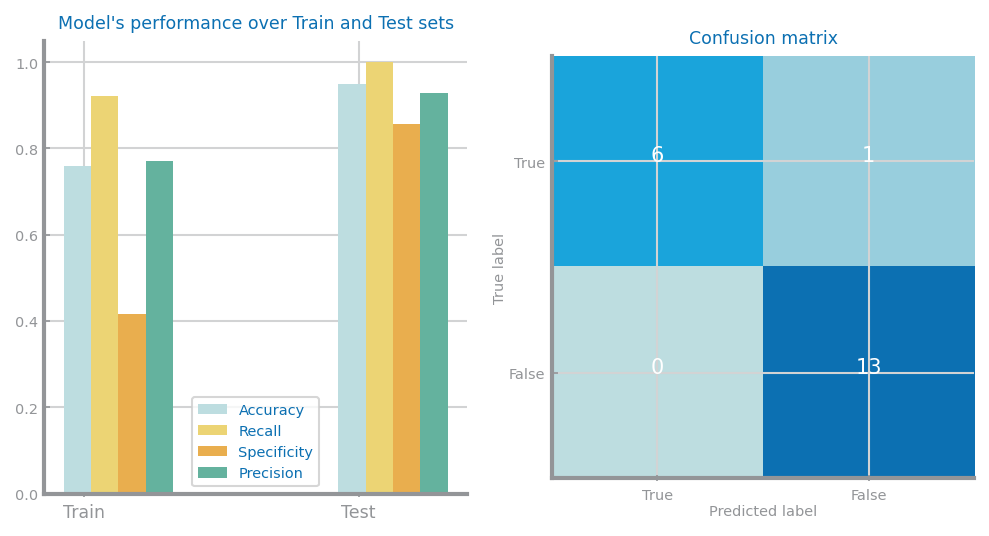

In [116]:

clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Normalized

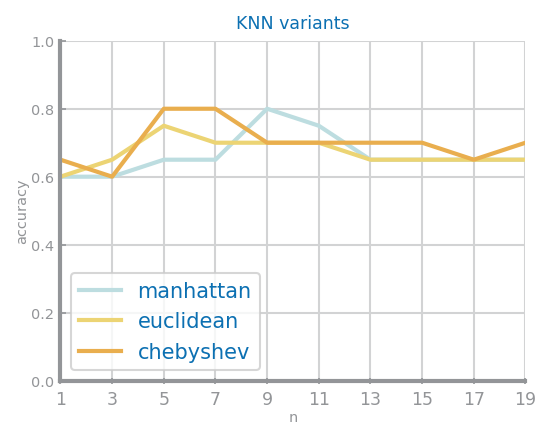

Best results with 5 neighbors and chebyshev


In [112]:
hf_df = norm_data_minmax.copy().drop(columns=['time'])
y: np.ndarray = hf_df.pop('DEATH_EVENT').values
X: np.ndarray = hf_df.values
labels = pd.unique(y)

trnY, prd_trn, tstY, prd_tst, trnX, tstX = KFold(X, y, 15)

nvalues, values = KNN(trnX, trnY, tstY, prdY)

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

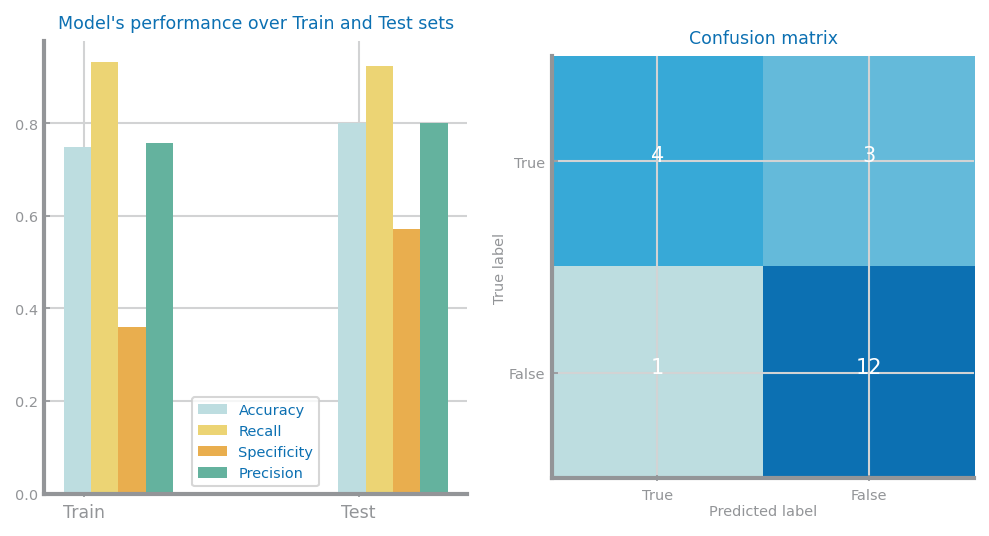

In [113]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

# Toxicity Dataset

## Scaling

All of the variables are binary and with values from 0 to 1 and so there is no need to scale the variables, since they all have the same scale.

## Naive Bayes

### No balancing

In [4]:
t_data_1 = get_t_data(feature_selection=False)
t_data_2 = get_t_data(feature_selection=True)

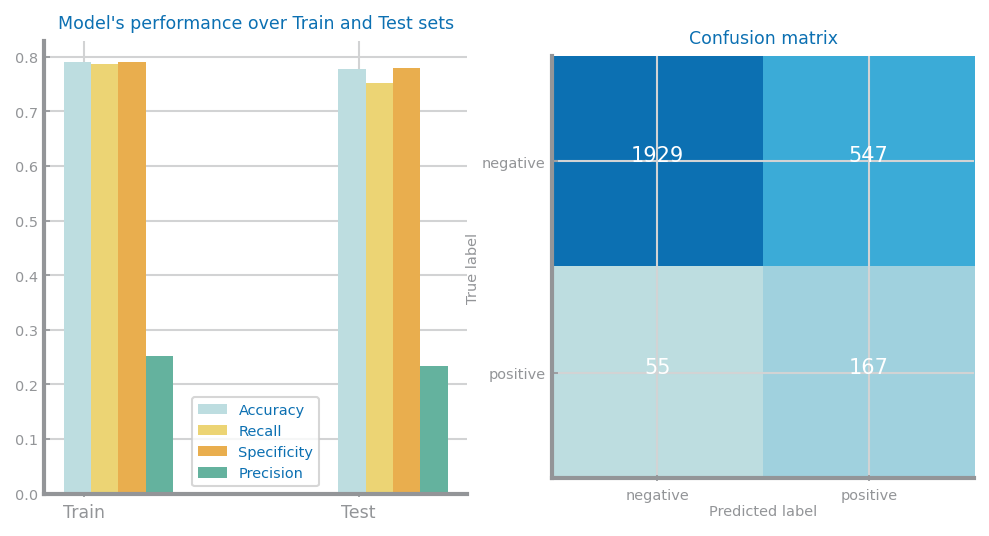

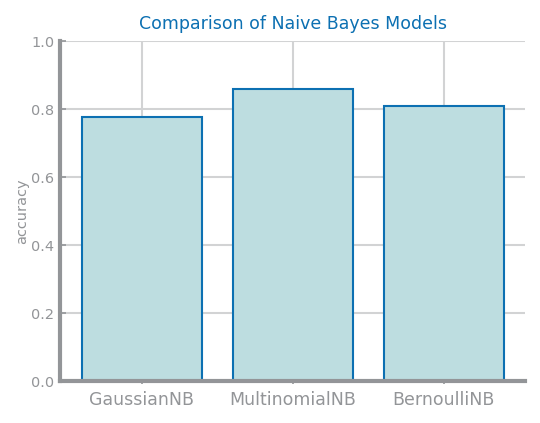

In [5]:
naiveBayes(t_data_1, 'toxic', kfold=False)

### Undersample

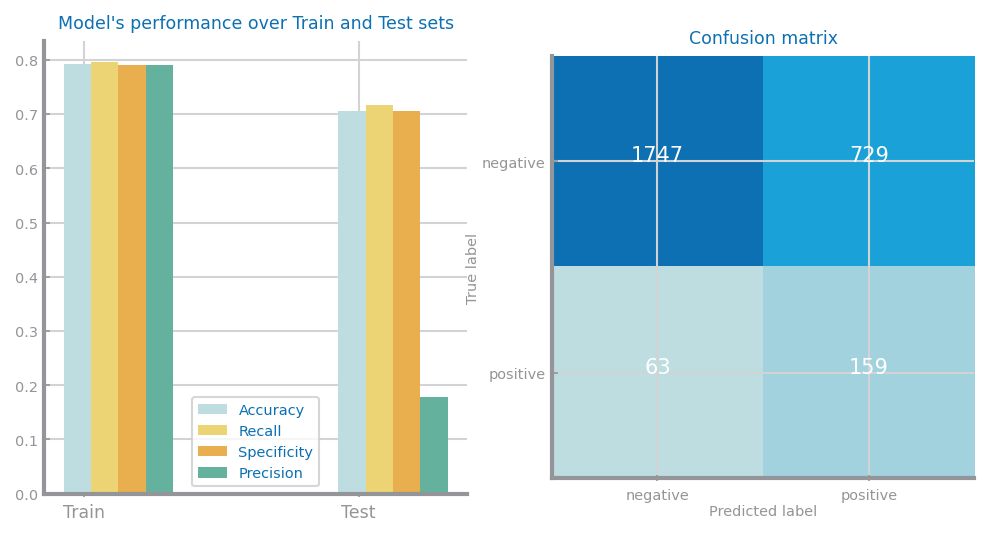

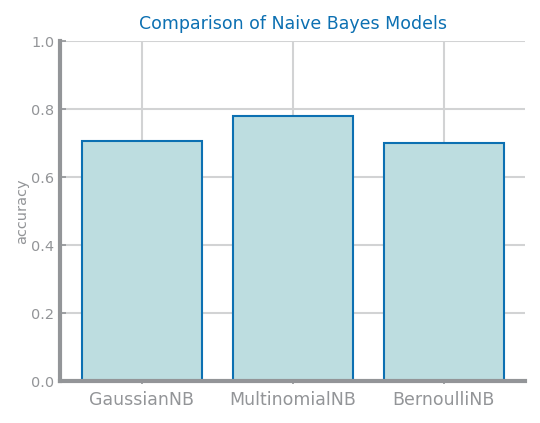

In [6]:
naiveBayes(t_data_1, 'toxic', kfold=False, balancing='undersample')

### Oversample

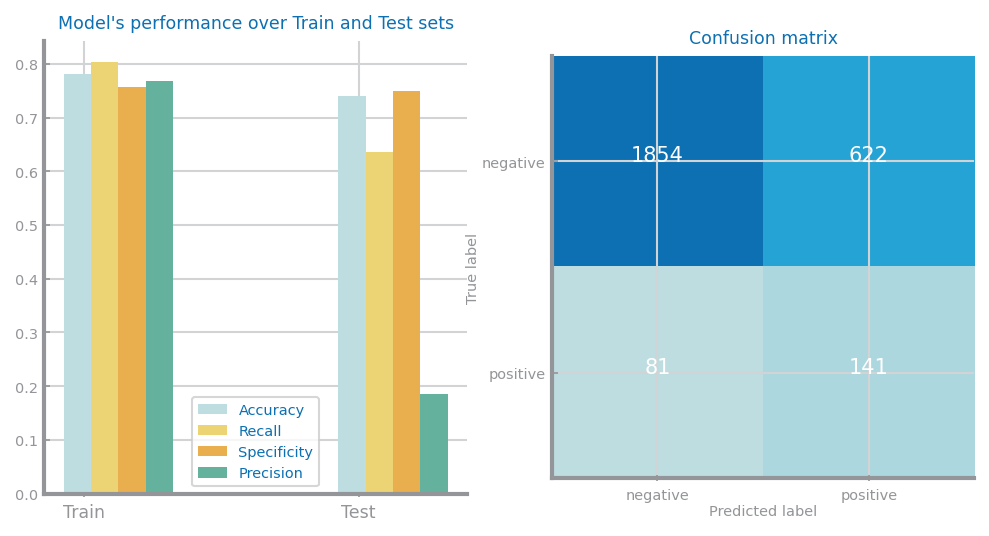

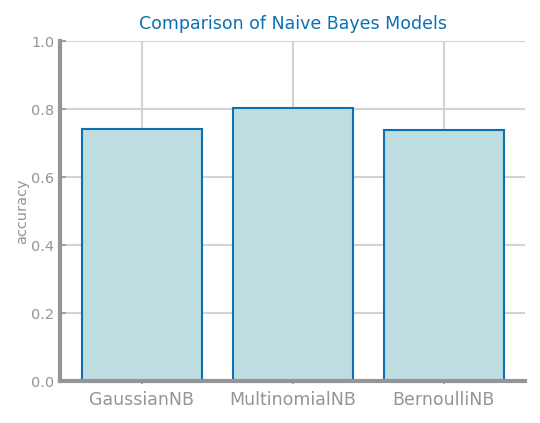

In [7]:
naiveBayes(t_data_1, 'toxic', kfold=False, balancing='oversample')

### SMOTE

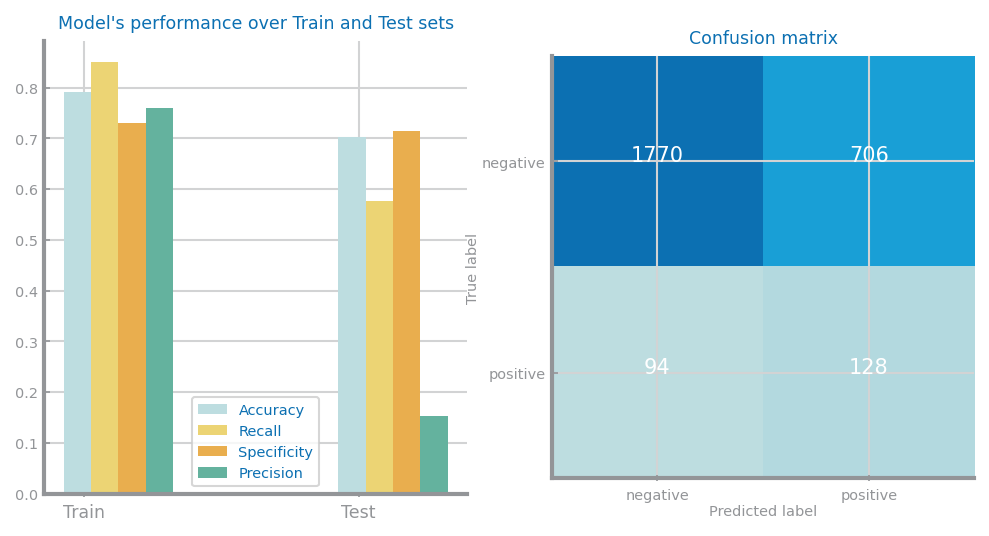

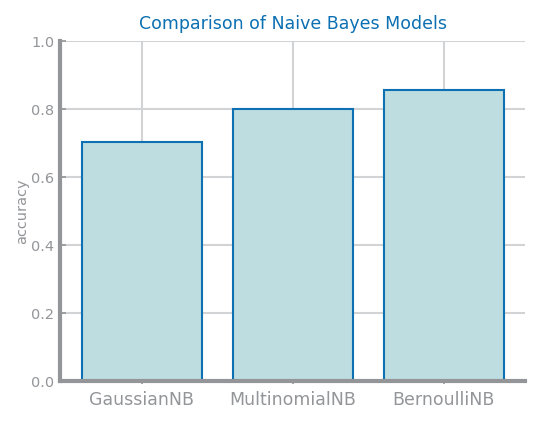

In [8]:
naiveBayes(t_data_1, 'toxic', kfold=False, balancing='smote')

## KNN

100%|██████████| 18/18 [09:24<00:00, 31.39s/it]


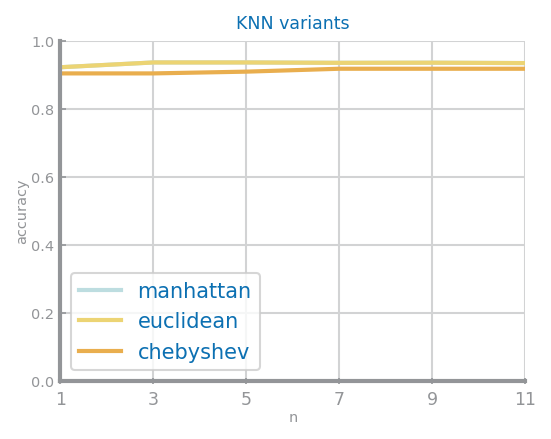

Best results with 3 neighbors and manhattan, with accuracy 0.94


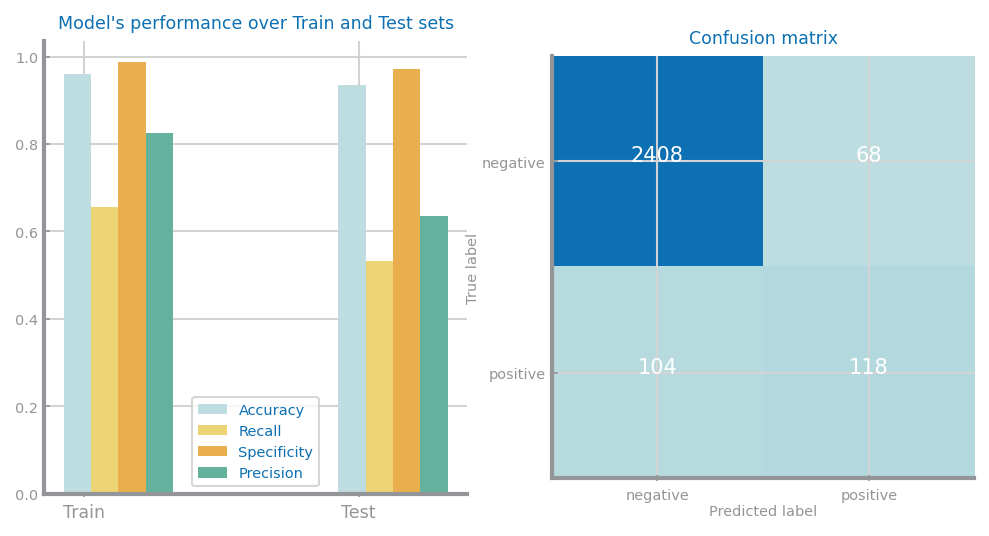

In [11]:
res = KNN(t_data_1, 'toxic',quick=True, kfold=False)